# Выгрузим все данные, оставим группы с $Ntot > 30$

In [4]:
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Vizier.ROW_LIMIT = -1
gr_s = Vizier.query_constraints(catalog="J/A+A/596/A14/grlist_s", Ntot=">30")[0].to_pandas()
gr_2 = Vizier.query_constraints(catalog="J/A+A/596/A14/grlist_2", Ntot=">30")[0].to_pandas()
ga_s = Vizier.query_constraints(catalog="J/A+A/596/A14/galist_s")[0].to_pandas()
ga_2 = Vizier.query_constraints(catalog="J/A+A/596/A14/galist_2")[0].to_pandas()

# Отсортируем по iGrID и оставим те галактики, которые входят в оставшиеся группы

In [5]:
gr_s= gr_s.sort_values(by = 'iGrID')
gr_2= gr_2.sort_values(by = 'iGrID')
ga_s= ga_s.sort_values(by = 'iGrID')
ga_2= ga_2.sort_values(by = 'iGrID')

ga_s = ga_s.loc[ga_s['iGrID'].isin(gr_s.iGrID)]
ga_2 = ga_2.loc[ga_2['iGrID'].isin(gr_2.iGrID)]

# Теперь объединим таблицы групп и галактик

In [6]:
glist_s = pd.merge(ga_s, gr_s, on='iGrID', how='left',suffixes=('_gal','_group')) 
glist_2 = pd.merge(ga_2, gr_2, on='iGrID', how='left',suffixes=('_gal','_group')) 
glist_s = glist_s.drop(['Dist_gal','Dist_group'], axis=1)

In [7]:
glist_2.to_csv(path_or_buf='glist_2.csv', index=False)
glist_s.to_csv(path_or_buf='glist_s.csv', index=False)

# Функция для построения scatter plot для групп галактик
## по OX: угловое расстояние от галактики до центра группы, по OY: разница между красным смещением галактики и красным смещением центра



In [9]:
glist_2 = pd.read_csv("./glist_2.csv")
glist_s = pd.read_csv("./glist_s.csv")

In [10]:
def get_catalog_name(x, vs=vars()):
    for k in vs:
        if type(x) == type(vs[k]):
            if x is vs[k]:
                return k
    return None


def gal_plot(iGrID_num, glist):
    sample = glist[glist.iGrID == iGrID_num]
    raj_gal = list(sample.RAJ2000_gal)
    raj_gr = list(sample.RAJ2000_group)
    dej_gal = list(sample.DEJ2000_gal)
    dej_gr = list(sample.DEJ2000_group)
    gal_coord = SkyCoord(raj_gal, dej_gal, unit='deg', frame='icrs')
    gr_coord = SkyCoord(raj_gr, dej_gr, unit='deg', frame='icrs')
    dist = gal_coord.separation(gr_coord).deg
    z_gal = np.array(sample.z_gal)
    z_gr = np.array(sample.z_group)
    plt.scatter(dist, z_gal - z_gr, s=15.15, color='black', marker='o')
    plt.xlabel('distance from center in degrees')
    plt.ylabel('z_gal - z_gr')
    plt.title(get_catalog_name(glist) + ', iGrID = ' + str(iGrID_num))
    plt.show()

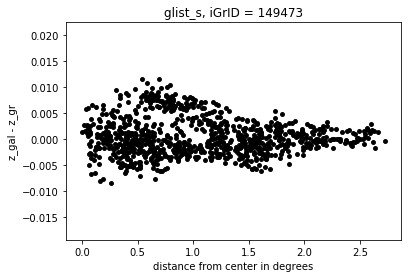

In [11]:
gal_plot(149473, glist_s)

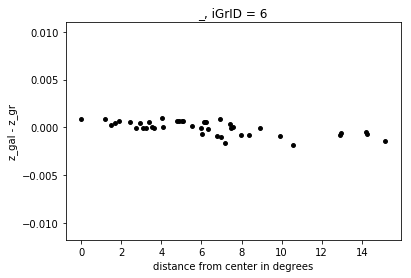

In [13]:
gal_plot(6, glist_2)